**สนามไฟฟ้าเนื่องจากประจุแบบจุด**

สำหรับประจุ Q = -2.5 mC วางอยู่ที่ตำแหน่ง (0,0,0)
$$\mathbf{E(r)}=\frac{\mathbf{Q}}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$

In [3]:
# Import initial library to use constants and commonly used functions
import numpy as np
from libemag.emag_initials import *

def E_func(x, y, z):
    Q = -2.5e-3
    rp = np.array([0, 0, 0])
    r = np.array([x, y, z])
    R = r - rp
    return Q / (4.0 * pi * epsilon_0) * R / norm(R)**3

In [4]:
E_func(1, -1, 1)

array([-4324137.87218141,  4324137.87218141, -4324137.87218141])

**กราฟของสนามไฟฟ้าใน 2 มิติ**

In [5]:
import numpy as np
from libemag.emag_initials import *

def E_func(x, y):
    Q = 2.5e-9
    rp = np.array([0, 0])
    r = np.array([x, y])
    R = r - rp
    return Q / (4.0 * pi * epsilon_0) * R / norm(R)**3

**ฟังก์ชัน field_plot()**

สามารถใช้ฟังก์ชันนี้ในการพล็อตสนามเวคเตอร์ใน 2 มิติ ด้วยการส่งผ่านฟังก์ชันที่ใช้ในการคำนวณสนามเป็น input

<Axes: xlabel='x', ylabel='y'>

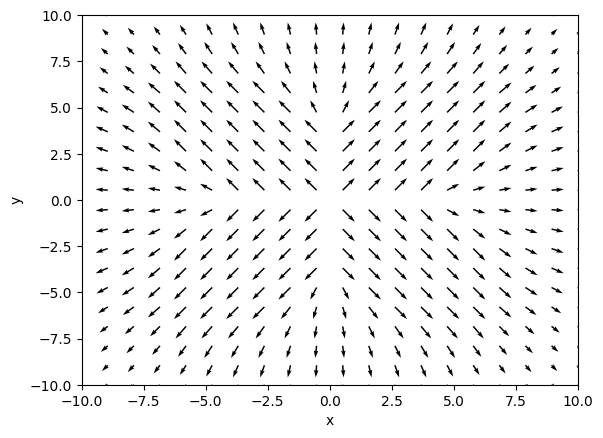

In [6]:
from libemag.plots import field_plot
field_plot(E_func)

#### สนามไฟฟ้าเนื่องจากประจุแบบจุดหลายตัว
$$\mathbf{E(r)}=\sum_i^N\mathbf{E_i(r)}$$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot

# ขนาดของประจุแต่ละตัว
Qs = np.array([10e-6, -1e-6, 2.5e-6, -2.5e-6])
# ตำแหน่งของประจุ
rps = np.array([[-1,-1], [-1, 1], [1, -1], [1, 1]])
# Function ของสนามไฟฟ้า

def E_func(x, y):
    Etotal = 0
    for i, Q in enumerate(Qs):
        r = np.array([x, y])
        rp = rps[i]
        R = r - rp
        E = Q / (4.0 * pi * epsilon_0) * R / norm(R)**3
        Etotal += E
    return Etotal

In [14]:
E_func(1, 5)

array([509.56058872, 949.48010733])

#### Plot สนามไฟฟ้าโดยใช้ฟังก์ชัน field_plot()

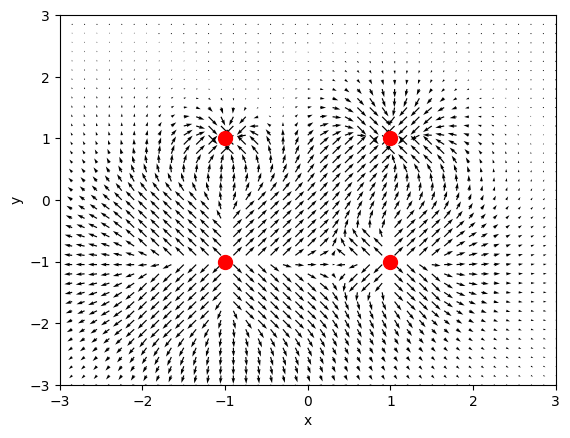

In [18]:
X = rps[:, 0]
Y = rps[:, 1]
field_plot(E_func, x_min=-3, x_max=3, y_min=-3, y_max=3, num_grids=41)
plt.scatter(X, Y, s=100, color='r')
plt.show()


### 3D Plots

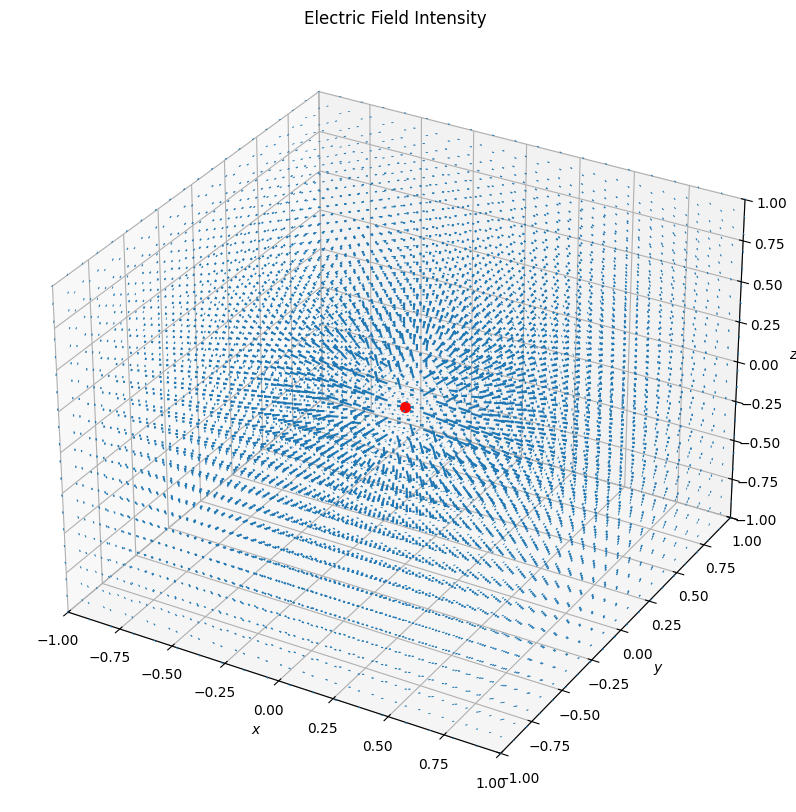

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from libemag.emag_initials import *
import scienceplots
# plt.style.use(['science', 'notebook'])

Q = 1e-6
def E(x, y, z):
    r = np.array([x, y, z])
    rp = np.array([0, 0, 0])
    field = Q / (4.0 * pi * epsilon_0) * (r - rp) / norm(r - rp)**3
    return field

_ = np.linspace(-1, 1, 20)
X, Y, Z = np.meshgrid(_, _, _)

E_func = np.vectorize(E, signature='(),(),()->(n)')
E_field = E_func(X, Y, Z)

Ex_field = E_field[:,:, :, 0]
Ey_field = E_field[:, :, :, 1] 
Ez_field = E_field[:, :, :, 2]

scale_factor = 1.0 / np.sqrt(Ex_field.max()**2 + Ey_field.max()**2 + Ez_field.max()**2)

Ex = Ex_field * scale_factor
Ey = Ey_field * scale_factor
Ez = Ez_field * scale_factor

Emax = np.std(Ex) * 1.5
Ex[Ex>Emax] = Emax
Ey[Ey>Emax] = Emax
Ez[Ez>Emax] = Emax

Ex[Ex<-Emax] = -Emax
Ey[Ey<-Emax] = -Emax
Ez[Ez<-Emax] = -Emax

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

ax.set_title('Electric Field Intensity')

ax.scatter(0, 0, 0, color='r', s=50)
ax.quiver(X, Y, Z, Ex, Ey, Ez)
plt.show()